In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display
import os

In [4]:
class PlotDrawer:
    def __init__(self, output_folder='plots'):
        self.output_folder = output_folder
        os.makedirs(output_folder, exist_ok=True)

    def draw_plots(self, data_frame):
        # Create plots for comparing different columns
        columns_to_plot = ['gt_corners', 'rb_corners', 'mean', 'max', 'min']
        for column in columns_to_plot:
            plt.figure(figsize=(8, 6))
            plt.hist(data_frame[column], bins=30, edgecolor='k')
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.grid(True)
            plot_path = os.path.join(self.output_folder, f'{column}_histogram.png')
            plt.savefig(plot_path)
            plt.close()

        # Return paths to all plots
        plot_paths = [os.path.join(self.output_folder, f'{column}_histogram.png')
                      for column in columns_to_plot]
        return plot_paths

def main(json_file_path):
    # Read JSON file as a pandas dataframe
    try:
        df = pd.read_json(json_file_path)
    except Exception as e:
        print(f"Error reading JSON file: {e}")
        return

    # Create a PlotDrawer instance
    plot_drawer = PlotDrawer()

    # Draw and save plots
    plot_paths = plot_drawer.draw_plots(df)

    return plot_paths

In [5]:
json_file_path = "https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json"
plot_paths = main(json_file_path)

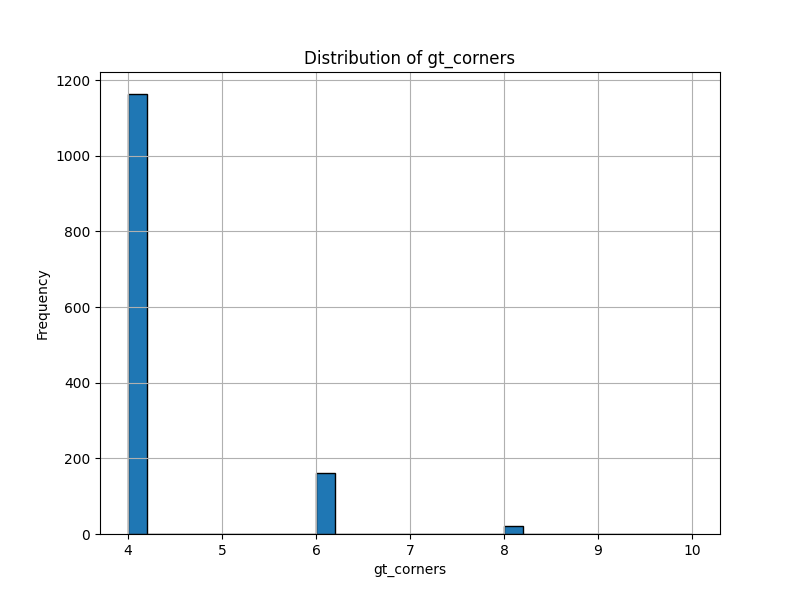

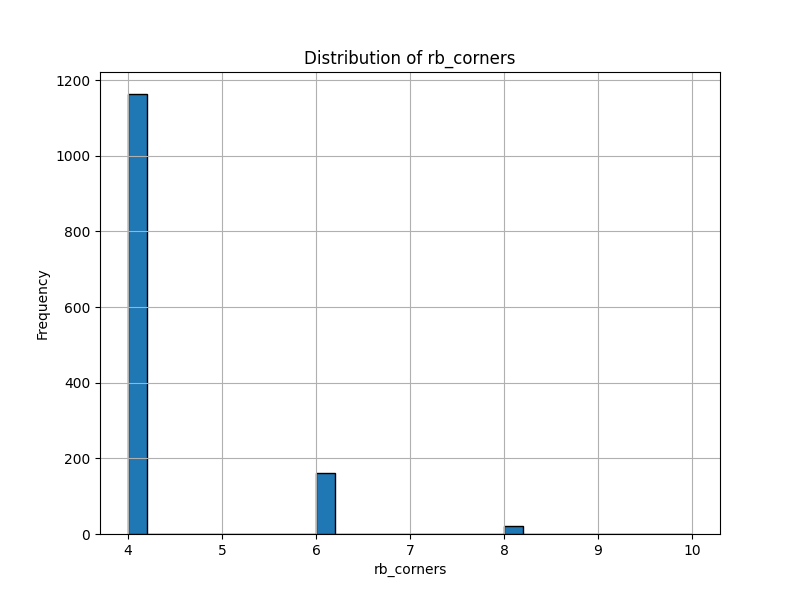

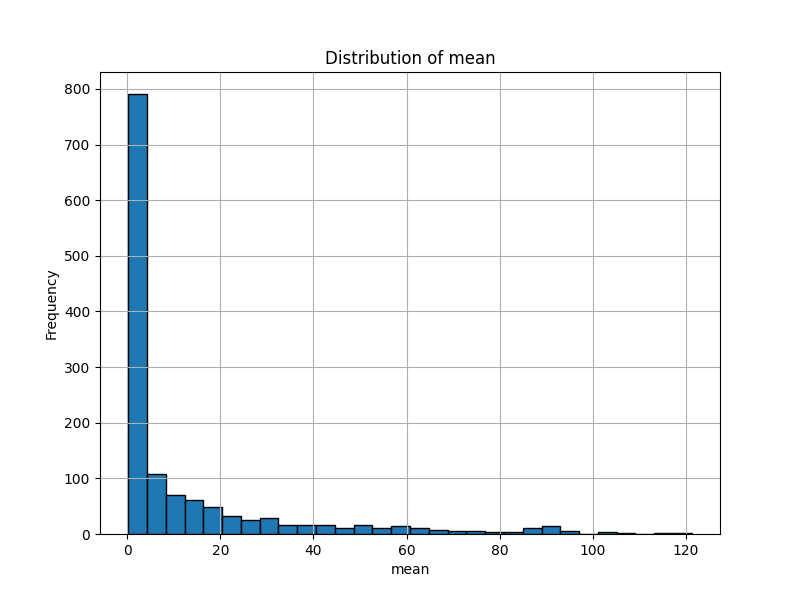

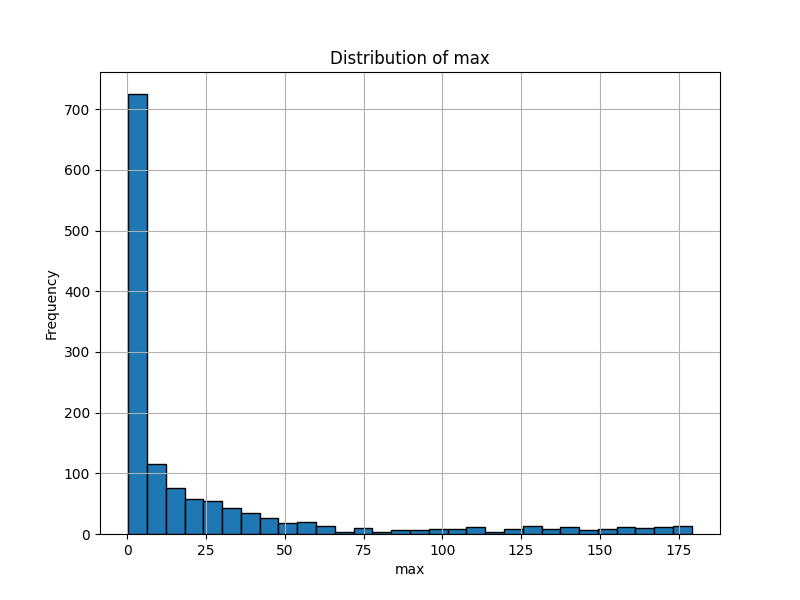

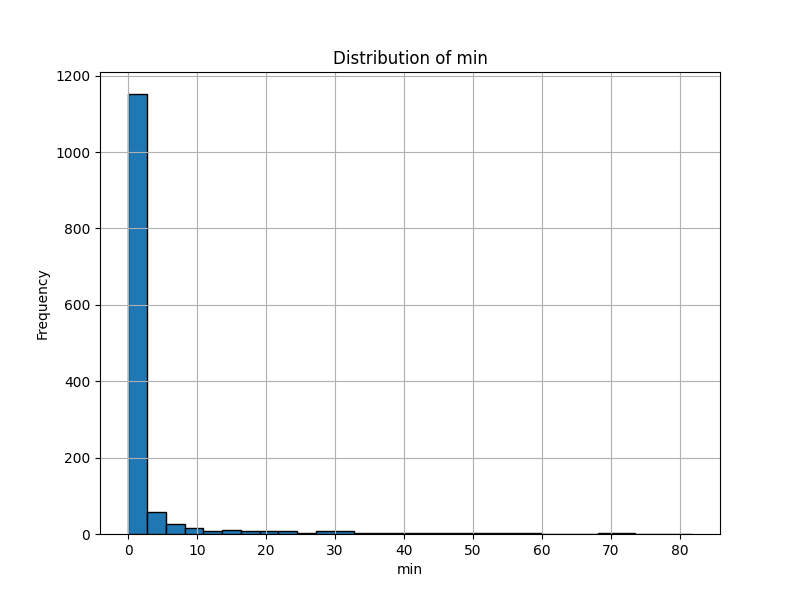

In [7]:
for path in plot_paths:
    display(Image(filename=path))